In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!ln -s /content/drive/My\ Drive/ /my\drive

In [3]:
#파이토치 불러오기
!pip3 install https://download.pytorch.org/whl/cu100/torch-1.1.0-cp36-cp36m-linux_x86_64.whl
!pip3 install https://download.pytorch.org/whl/cu100/torchvision-0.3.0-cp36-cp36m-linux_x86_64.whl

     |████████████████████████████████| 770.7MB 22kB/s 
ERROR: torchvision 0.7.0+cu101 has requirement torch==1.6.0, but you'll have torch 1.1.0 which is incompatible.
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
     |████████████████████████████████| 2.6MB 3.9MB/s 
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101


In [4]:
import torch
import pickle
import matplotlib.pyplot as plt

In [9]:
shp_original_img = (100,100)
broken_img = torch.FloatTensor(pickle.load(open('/content/drive/My Drive/특강/Pytorch/broken_image_t.p','rb'), encoding='latin1'))

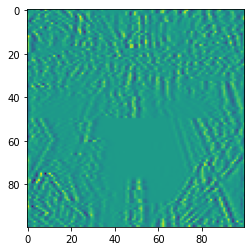

In [10]:
plt.imshow(broken_img.view(100,100))

In [17]:
def weird_function(x, n_iter=5):
  h=x
  filt = torch.tensor([-1./3, 1./3, -1./3])
  for i in range(n_iter):
    zero_tensor = torch.tensor([1.0*0])
    h_l = torch.cat((zero_tensor, h[:-1]), 0)
    h_r = torch.cat((h[1:], zero_tensor), 0)
    h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
    if i % 2 ==0:
      h = torch.cat((h[h.shape[0]//2:], h[:h.shape[0]//2]), 0)
    return h

In [18]:
# 가설과 오염된 이미지 사이 오차 계산
# torch.dist() 두 텐서 사이 거리 구하는 함수

def distance_loss(hypothesis, broken_img):
  return torch.dist(hypothesis, broken_img)

In [19]:
# 무작위 값을 가진 텐서 생성
# torch.randn()
random_tensor = torch.randn(10000, dtype = torch.float)

In [20]:
# lr = learning rate(학습률), 학습을 얼마나 급하게 진행하는가
# 너무 클 경우 최솟값을 찾지 못하고, 너무 작으면 학습 속도가 느려진다.
lr = 0.8
for i in range(0,20000):
  random_tensor.requires_grad_(True)
  hypothesis = weird_function(random_tensor)
  loss = distance_loss(hypothesis, broken_img)
  loss.backward()

  with torch.no_grad():
    tandom_tensor = random_tensor - lr*random_tensor.grad

  if i % 1000 ==0:
    print('Loss as {} = {}'.format(i, loss.item()))

Loss as 0 = 58.349632263183594
Loss as 1000 = 58.349632263183594
Loss as 2000 = 58.349632263183594
Loss as 3000 = 58.349632263183594
Loss as 4000 = 58.349632263183594
Loss as 5000 = 58.349632263183594
Loss as 6000 = 58.349632263183594
Loss as 7000 = 58.349632263183594
Loss as 8000 = 58.349632263183594
Loss as 9000 = 58.349632263183594
Loss as 10000 = 58.349632263183594
Loss as 11000 = 58.349632263183594
Loss as 12000 = 58.349632263183594
Loss as 13000 = 58.349632263183594
Loss as 14000 = 58.349632263183594
Loss as 15000 = 58.349632263183594
Loss as 16000 = 58.349632263183594
Loss as 17000 = 58.349632263183594
Loss as 18000 = 58.349632263183594
Loss as 19000 = 58.349632263183594


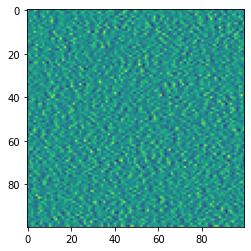

In [22]:
plt.imshow(tandom_tensor.view(100,100).data)